# Purpose-Driven Data Science

Up until now, we have focused our attention on learning what and how and less so on the when and why. Today we are going to take an outcome-based approach to learning about what types of problems warrant the usage of various techniques.

It is important to understand that these techniques are often nuanced, and applying them blindly without full understanding proper usage can wind up with unintended consequences. We are only going to scratch the surface on these techniques so that you can 1) know of their existence, and 2) know what situations may warrant their usage. It is still incumbent upon you to learn more about these techniques before using them.

Before we get into the details, I want to go over two final concepts that are critical to understanding applied data science:
- Hypothesis testing
- Statistical error types

Hypothesis testing is a foundational tool for statistical inference. Hypothesis testing is set up such that it is the analyst's burden to "prove" that two values are NOT the same or that some outcome is NOT likely.

For example, let's take the following data set predicting mobile phone usage based on various user characteristics.

In [1]:
phone_usage_df = read.csv('device_usage.csv')

In [2]:
head(phone_usage_df, 5)

device_id,gender,age,income,phone,has_degree,avg_usage_hrs
007ad936-5de0-439b-bcd9-35902a92f12b,Female,45-54,Low,Android,FALSE,1.627491
c280080e-256d-4b9f-830d-1f8074547e99,Male,35-44,Low,iPhone,FALSE,2.106877
a995ba01-85b0-4e77-90fc-b14ccc3944ad,Female,45-54,Low,Android,FALSE,1.474798
bec85156-baa8-4e9f-af30-266100f51e00,Female,18-24,Medium,iPhone,TRUE,2.660379
dd96c2ad-d829-4690-87b8-325444a8fb8a,Male,45-54,Low,iPhone,TRUE,1.451175


In [3]:
mean(phone_usage_df$avg_usage_hrs)

[1] 2.323047

### Identifying Appropriate Hypothesis Statements

If we were to perform an analysis on phone usage based on gender, we could ask ourselves two similar, but very different analytitical hypotheses:
1. "Females use their phones more than males", or
2. "The amount of time females use their phones differs from that of males"

The way you frame your question is completely dependent on the study you are trying to perform. Sometimes being different is sufficient while other times you need to see a particular outcome in order for the results to be relevant.

What are possible analyses where we'd be more interested in Hypothesis 1. What about Hypothesis 2?

If we wanted to pursue Hypothesis 1, then the following would be the null and alternate hypotheses:
\begin{equation*}
\mu_0: \mu_{female} = \mu_{male}
\end{equation*}
\begin{equation*}
\mu_a: \mu_{female} \ne \mu_{male}
\end{equation*}

In this case, we would "reject the null hypothesis" if we could prove that females used their phones more OR less than males.

If we wanted to pursue Hypotheis 2 ,then the following would be the null and alternate hypotheses:
\begin{equation*}
\mu_0: \mu_{female} <= \mu_{male}
\end{equation*}
\begin{equation*}
\mu_a: \mu_{female} > \mu_{male}
\end{equation*}

#### Why can't I just use the sample means to make this assessment?

You may be wondering, why can't I just make my determination based on the means of the males and females from our sample? For our data, the following are our means:

In [4]:
means_by_gender = aggregate(phone_usage_df$avg_usage_hrs, by=list(Gender=phone_usage_df$gender), FUN=mean, data=phone_usage_df)
means_by_gender

Gender,x
Female,2.571857
Male,2.061101


While it seems that females use their phones more than males based on this data, we don't *know* whether they do because the true mean for females remains unknown. Let's look at the graphic below to understand why we can't just use these sample statistics to make a determination.

<img src="https://i.stack.imgur.com/ZfxV9m.png">

If we say that the confidence interval around the males is the curve on the left while the confidence interval for the females is the curve on the right, we can see that there is overlap in where the true mean for each gender *could* be. Even though it seems that the curve on the right is "further right" than the one on the one on the left, there are regions of the left curve that actually exceed that of the right curve. The amount of uncertainty is what determines whether we can or cannot reject the null hypothesis.

In [5]:
males <- subset(phone_usage_df, gender=='Male', select=avg_usage_hrs)
females <- subset(phone_usage_df, gender=='Female', select=avg_usage_hrs)
t.test(males$avg_usage_hrs, females$avg_usage_hrs)


	Welch Two Sample t-test

data:  males$avg_usage_hrs and females$avg_usage_hrs
t = -64.27, df = 49834, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5263329 -0.4951805
sample estimates:
mean of x mean of y 
 2.061101  2.571857 


In [6]:
t.test(females$avg_usage_hrs, males$avg_usage_hrs, alternative='greater')


	Welch Two Sample t-test

data:  females$avg_usage_hrs and males$avg_usage_hrs
t = 64.27, df = 49834, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.4976848       Inf
sample estimates:
mean of x mean of y 
 2.571857  2.061101 


In [ ]:
#is there a significant difference between the means of two groups

If we set our cutoff for "statistical significance" at 95%, then alpha would be 5%. Since our p-value is less than our alpha value we can reject the null hypothesis and "accept" the alternate hypothesis.

### Linear Modeling


In [14]:
phone_usage_df$gender <- factor(phone_usage_df$gender)
phone_usage_df$age <- factor(phone_usage_df$age)
phone_usage_df$income <- factor(phone_usage_df$income)
phone_usage_df$phone <- factor(phone_usage_df$phone)
phone_usage_df$has_degree <- factor(phone_usage_df$has_degree)
model <- lm(avg_usage_hrs ~ gender + phone  + income, data=phone_usage_df)

In [15]:
summary(model)
#R-squared chasing or lacking is a matter of over-specification vs over-generalization of the model. backwards and or forwards step-wise refression. information criteria. "information criteria linerar regressionakiki and basian/ AIC information criteria"


Call:
lm(formula = avg_usage_hrs ~ gender + phone + income, data = phone_usage_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4797 -0.5650 -0.1632  0.2910  4.4381 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.683873   0.012267  218.78   <2e-16 ***
genderMale   -0.507854   0.007835  -64.81   <2e-16 ***
phoneiPhone   0.200988   0.008126   24.73   <2e-16 ***
incomeLow    -0.392037   0.012363  -31.71   <2e-16 ***
incomeMedium -0.198757   0.011868  -16.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8757 on 49995 degrees of freedom
Multiple R-squared:  0.1068,	Adjusted R-squared:  0.1068 
F-statistic:  1495 on 4 and 49995 DF,  p-value: < 2.2e-16


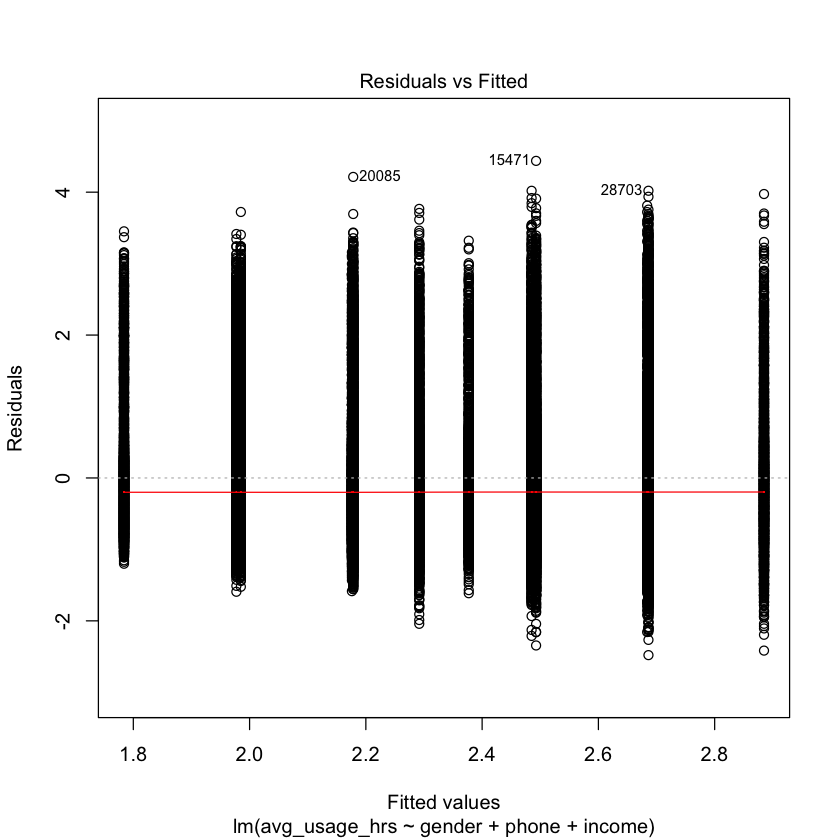

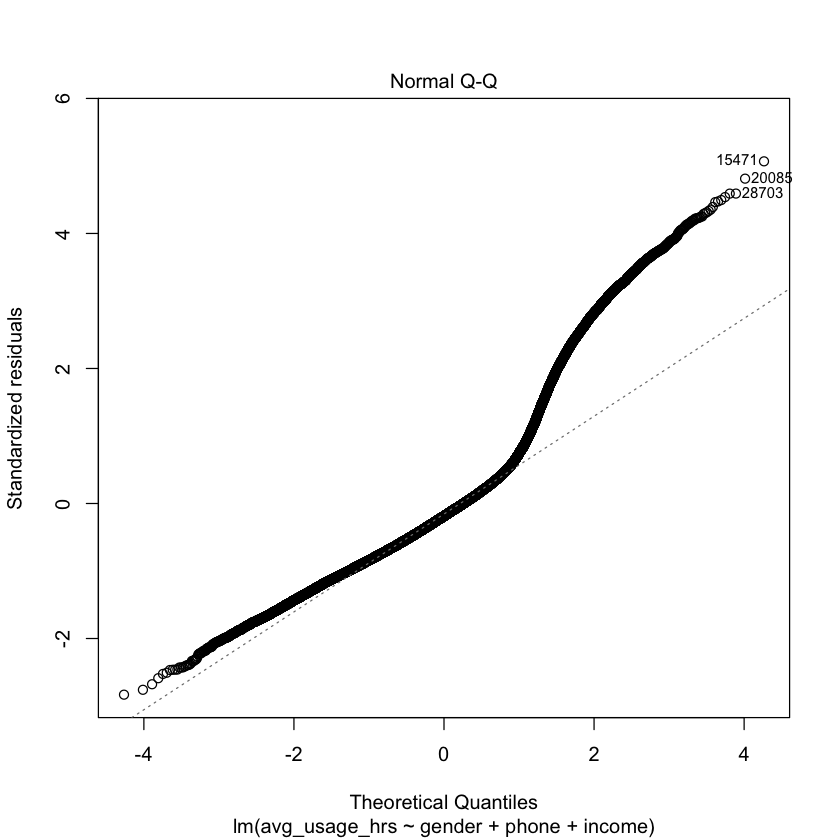

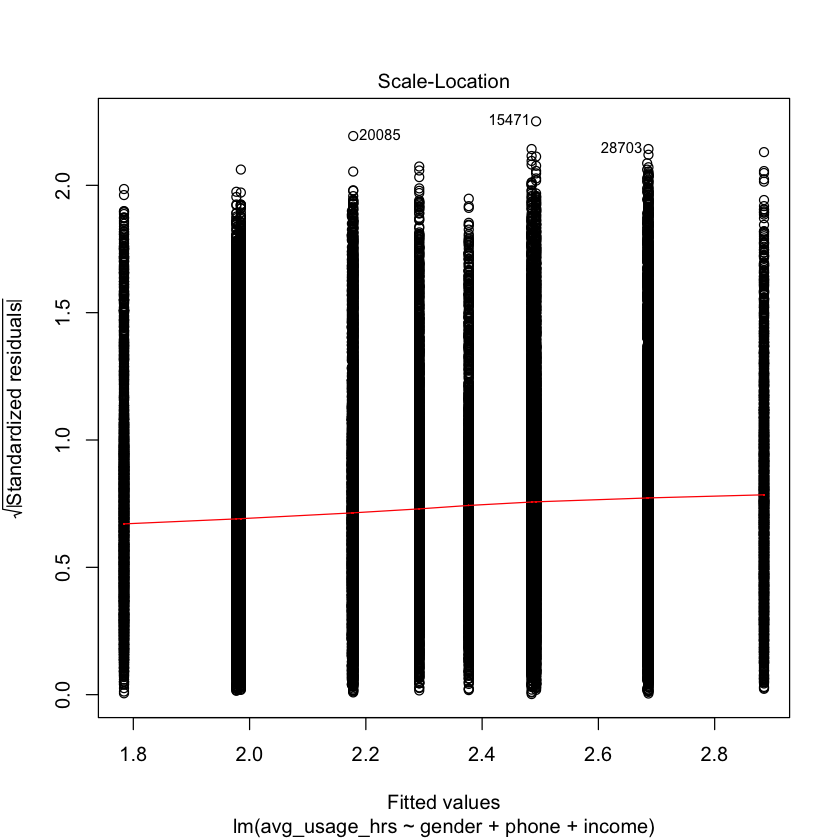

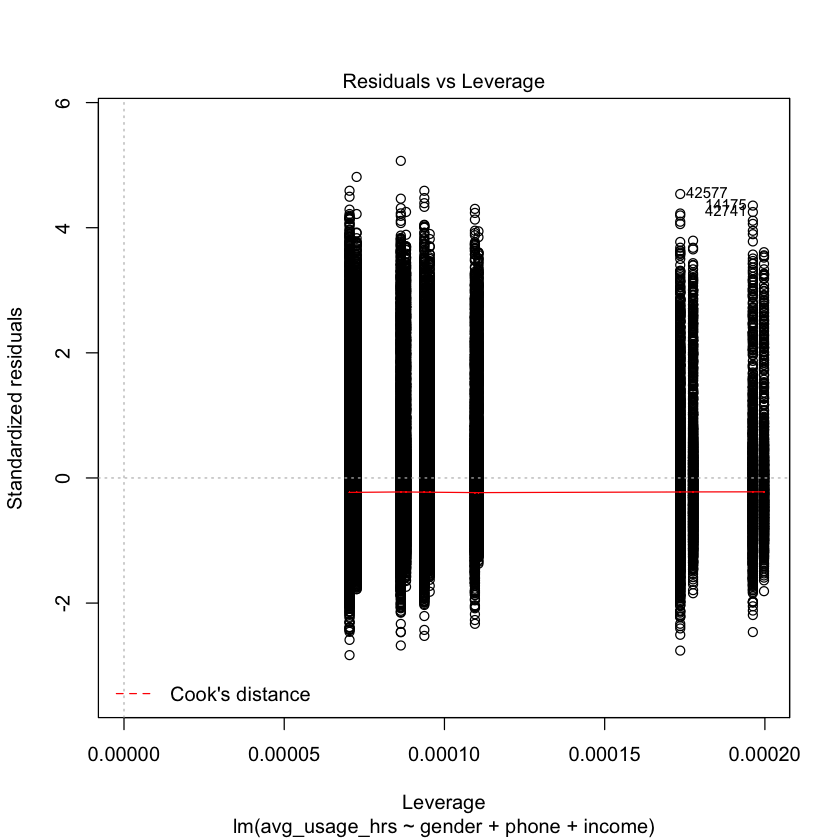

In [16]:
plot(model)

In [ ]:
#classification model predicts some sort of outcome, response variable
#another type of regression predcts 0s and 1s
#unit increase in variable results in rather than a continuious increase "x increased y" but rather now it results in

In [ ]:
#continueious response - linear regression model, for response variable not predictors!  
#Binary response  - classification regression model, or logistic  

In [18]:
#This image and verbiage combination resulted in 20% donations vs another combo resulting in 18%, statistical measurement is necessary because this is not the actual population (we didnt ask every single potential voter to visit the website" this is where a-b tests will come into play. )
p1 =.8
n1 = 10000

In [19]:
p2 = .2
n2 = 10000

In [22]:
vq = p1*(1-p1)
vq 

[1] 0.16

In [26]:
se1 <- sqrt(vq / n1)

In [27]:
p1 + 1.196*se1
p1 - 1.96*se1

[1] 0.804784

[1] 0.79216

In [29]:
v2 <- p2 *(1-p2)

In [30]:
p2 + 1.96*se1
p2 - 1.96*se2

[1] 0.20784

ERROR: Error in eval(expr, envir, enclos): object 'se2' not found
